<a href="https://colab.research.google.com/github/Inkarbaza/dissertation/blob/main/zeroshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers datasets peft accelerate bitsandbytes trl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.3/366.3 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/Inkar/raw_tweets_with_split.xlsx"
df = pd.read_excel(file_path)

df = df[["tweet_text", "cyberbullying_type", "dataset_type"]]
df = df.dropna()
df.head()

,tweet_text,cyberbullying_type,dataset_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying,test
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,test
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,test
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,test
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,test


In [ ]:
from datasets import Dataset, DatasetDict

train_df = df[df["dataset_type"] == "train"]
test_df = df[df["dataset_type"] == "test"]

train_dataset = Dataset.from_pandas(train_df[["tweet_text", "cyberbullying_type"]])
test_dataset = Dataset.from_pandas(test_df[["tweet_text", "cyberbullying_type"]])

dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [ ]:
from huggingface_hub import login
login()  # Вставишь токен при запускеb

In [ ]:
from transformers import AutoModelForCausalLM, pipeline
from transformers import AutoTokenizer
# Имя модели
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

# Загрузка модели и токенизатора
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Генератор текста
generator = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=64)

# Список меток, как в статье
labels = ['age-based', 'ethnicity-based', 'gender-based', 'religion-based', 'not_cyberbullying']

# Функция zero-shot классификации
def zero_shot_classify(text):
    prompt = (
        f"Analyze the content of the following social post: \"{text}\" and determine the type of cyberaggression. "
        f"Specifically, categorize it as one of the following types: {', '.join(labels)}."
    )
    response = generator(prompt)[0]["generated_text"]
    print(f"📝 PROMPT:\n{prompt}\n\n📍 MODEL RESPONSE:\n{response}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
import re

def zero_shot_classify(text):
    prompt = (
        f"Classify this post into one of the following categories: {', '.join(labels)}.\n"
        f"Post: \"{text}\"\n"
        f"Answer with one category only:"
    )

    result = generator(prompt, return_full_text=False, max_new_tokens=10, temperature=1e-5)[0]['generated_text']
    print("📤 Model output:", result)

    # Ищем первое вхождение известной метки
    result_clean = result.strip().lower()
    match = next((label for label in labels if re.search(rf"\b{re.escape(label)}\b", result_clean)), None)
    return match if match else "unknown"


# Пример
text_example = "You are such an old fool, get off the internet already!"
predicted = zero_shot_classify(text_example)
print(f"🔍 Predicted class: {predicted}")

📤 Model output:  age-based.
Post: "I'
🔍 Predicted class: age-based


In [ ]:
len(test_df)

7974

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import time

# Функция безопасной классификации с паузой
def safe_classify(text):
    try:
        return zero_shot_classify(text)
    except Exception as e:
        print("❌ Ошибка:", e)
        return "unknown"

# Предсказания на test_df
test_texts = test_df["tweet_text"].tolist()
true_labels = test_df["cyberbullying_type"].tolist()

start_time = time.time()
predicted_labels = [safe_classify(t) for t in test_texts]
print(f"\n⏱️ Классификация завершена за {round(time.time() - start_time, 2)} сек.")

Выходные данные были обрезаны до нескольких последних строк (5000).
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "//i
📤 Model output:  age-based.
Post: "i'
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "I’
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "I’
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "i'
📤 Model output:  age-based.
Post: "Hey
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "I’
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based

Based on the text
📤 Model output:  age-based.
Post: "Neo
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "The Pan
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "I'
📤 Model output:  age-based.
Post: "i'
📤 Mo

In [ ]:
from collections import Counter
Counter(predicted_labels)

Counter({'age-based': 7818,
         'religion-based': 66,
         'gender-based': 89,
         'unknown': 1})

In [ ]:
from collections import Counter
Counter(true_labels)

Counter({'not_cyberbullying': 1589,
         'gender': 1595,
         'religion': 1600,
         'age': 1598,
         'ethnicity': 1592})

In [ ]:
label_map = {
    "age": "age-based",
    "gender": "gender-based",
    "religion": "religion-based",
    "ethnicity": "ethnicity-based",
    "not_cyberbullying": "not_cyberbullying"
}

true_labels_mapped = [label_map[label] for label in true_labels]

In [ ]:
# Нормализация меток
true_labels = [label.strip().lower() for label in true_labels_mapped]
predicted_labels = [label.strip().lower() for label in predicted_labels]

# Метки из модели
print("📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, labels=labels))

print(f"✅ Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}")

📊 Classification Report:
                   precision    recall  f1-score   support

        age-based       0.20      1.00      0.34      1598
  ethnicity-based       0.00      0.00      0.00      1592
     gender-based       0.88      0.05      0.09      1595
   religion-based       0.86      0.04      0.07      1600
not_cyberbullying       0.00      0.00      0.00      1589

        micro avg       0.22      0.22      0.22      7974
        macro avg       0.39      0.22      0.10      7974
     weighted avg       0.39      0.22      0.10      7974

✅ Accuracy: 0.2172


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


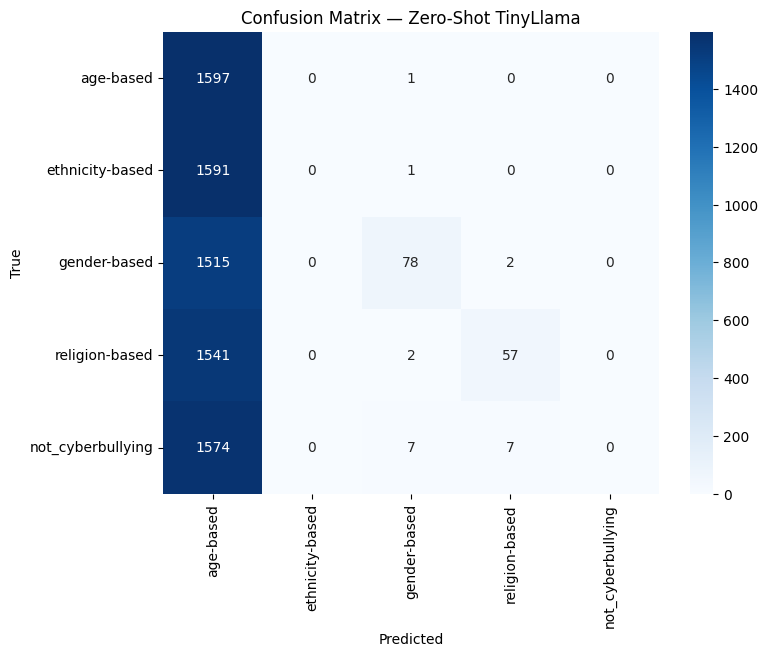

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix — Zero-Shot TinyLlama")
plt.show()


In [ ]:
def get_balanced_few_shot_examples(dataset, n_per_class=2):
    class_examples = {label: [] for label in label_map.keys()}

    # Проходим по всему train_dataset и собираем по классу
    for text, label in zip(dataset["tweet_text"], dataset["cyberbullying_type"]):
        if len(class_examples[label]) < n_per_class:
            class_examples[label].append(text.strip().replace('\n', ' '))

    # Преобразуем в список (text, mapped_label)
    few_shot = []
    for original_label, texts in class_examples.items():
        mapped_label = label_map[original_label]
        for text in texts:
            few_shot.append((f'"{text}"', mapped_label))

    return few_shot

In [ ]:
get_balanced_few_shot_examples(train_dataset, n_per_class=2)

[('"Here at home. Neighbors pick on my family and I. Mind you my son is autistic. It feels like high school. They call us names attack us for no reason and bully us all the time. Can\'t step on my front porch without them doing something to us"',
  'age-based'),
 ('"Being bullied at school: High-achieving boys use further strategies to maintain masculinity, for example becoming bullies themselves, disrupting the lessons, or devaluing girls’ achievements https://www.bipartisanalliance.com/2019/12/being-bullied-at-school-high-achieving.html?spref=tw"',
  'age-based'),
 ('"rape is real..zvasiyana nema jokes about being drunk or being gay or being lesbian...rape is not ones choice or wish..thtz where the sensitivity is coming from"',
  'gender-based'),
 ('"You never saw any celebrity say anything like this for Obama: B Maher Incest Rape \'Joke\' S Colbert Gay \'joke\' K Griffin beheading \'joke\'"',
  'gender-based'),
 ('"Sudeep, did she invite him though? No right? Why are you getting wor

In [ ]:
few_shot_examples = [
    ('"I hate old people, they’re useless."', "age-based"),
    ('"You act like a woman, so emotional."', "gender-based"),
    ('"You believe in fairy tales like religion."', "religion-based"),
    ('"You look like a terrorist, must be Muslim."', "ethnicity-based"),
    ('"Nice photo, have a good day!"', "not_cyberbullying")
]


In [ ]:
def few_shot_classify(text):
    examples = get_balanced_few_shot_examples(train_dataset, n_per_class=2)

    shots = ""
    for ex_text, ex_label in examples:
        shots += f"Post: {ex_text}\nCategory: {ex_label}\n\n"

    prompt = (
        f"{shots}"
        f"Choose from the following categories: {', '.join(labels)}.\n"
        f"Post: \"{text}\"\n"
        f"Answer with exactly one category:"
    )

    result = generator(prompt, return_full_text=False, max_new_tokens=10, temperature=1e-5)[0]['generated_text']
    print("📤 Model output:", result)

    result_clean = result.strip().lower()
    for label in labels:
        if label in result_clean:
            return label
    return "unknown"


In [ ]:
def safe_classify(text):
    try:
        return few_shot_classify(text)
    except Exception as e:
        print("❌ Ошибка:", e)
        return "unknown"


In [ ]:
predicted_labels = [safe_classify(t) for t in test_texts]

Выходные данные были обрезаны до нескольких последних строк (5000).
📤 Model output:  age-based.
📤 Model output:  age-based.
📤 Model output:  age-based.
📤 Model output:  not_cyberbullying.
📤 Model output:  gender-based.
📤 Model output:  age-based.
📤 Model output:  not_cyberbullying.
📤 Model output:  age-based.
📤 Model output:  not_cyberbullying.
📤 Model output:  age-based.
📤 Model output:  age-based.
📤 Model output:  age-based.
📤 Model output:  age-based.
📤 Model output:  age-based.
📤 Model output:  age-based.
📤 Model output:  not_cyberbullying.
📤 Model output:  age-based.
📤 Model output:  not_cyberbullying.
📤 Model output:  gender-based.
📤 Model output:  gender-based.
📤 Model output:  not_cyberbullying.
📤 Model output:  not_cyberbullying.
📤 Model output:  not_cyberbullying.
📤 Model output:  age-based.
📤 Model output:  age-based.
📤 Model output:  age-based.
📤 Model output:  age-based.
📤 Model output:  not_cyberbullying.
📤 Model output:  age-based.
📤 Model output:  gender-based.
📤 Model 

KeyError: 'gender-based'

In [ ]:
print(classification_report(true_labels_mapped, predicted_labels, labels=labels))

                   precision    recall  f1-score   support

        age-based       0.25      0.85      0.38      1598
  ethnicity-based       1.00      0.00      0.00      1592
     gender-based       0.83      0.09      0.16      1595
   religion-based       0.93      0.21      0.35      1600
not_cyberbullying       0.19      0.22      0.21      1589

        micro avg       0.28      0.28      0.28      7974
        macro avg       0.64      0.28      0.22      7974
     weighted avg       0.64      0.28      0.22      7974



In [ ]:
from collections import Counter
Counter(predicted_labels)

Counter({'not_cyberbullying': 1852,
         'age-based': 5482,
         'unknown': 102,
         'gender-based': 168,
         'religion-based': 369,
         'ethnicity-based': 1})

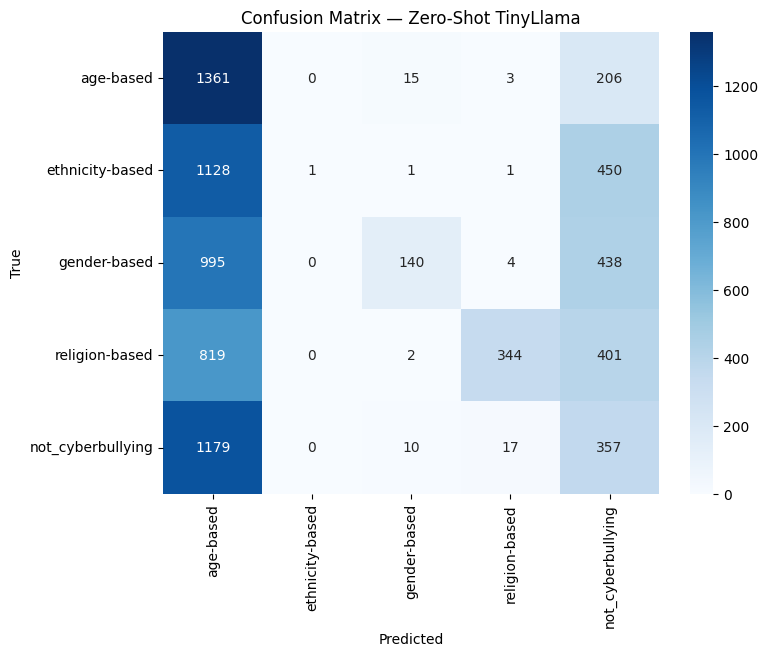

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix — Zero-Shot TinyLlama")
plt.show()
